In [1]:
import pandas as pd # импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('data.xlsx') # загружаем данные и смотрим на них
df.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


In [ ]:
df.shape

(730, 8)

Полученная таблица не является массивом, так как содержит в себе строки, представленные лишь месяцем. Необходимо преобразовать таблицу в массив, сохранив при этом месяц. Для этого создадим новую колонку месяц/год, а также удалим пустую колонку. После этого удалим строки с месяцами

In [3]:
df.drop('Unnamed: 5', axis=1, inplace=True)
df.head()

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00


In [4]:
df['month'] = None

for i in range(len(df)):
  if pd.isnull(df.loc[i, 'client_id']):
    month = df.status[i] # месяц попал в колонку status
  else:
    df['month'][i] = month

df.head()

<ipython-input-4-c2ccf0b49c0c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'][i] = month


,client_id,sum,status,sale,new/current,document,receiving_date,month
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,None
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-,Май 2021
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021


In [5]:
for i in range(len(df)): # удаляем строки с месяцами
  if pd.isnull(df.loc[i, 'client_id']):
    df.drop(index=i, axis=0, inplace=True)

df.head()

,client_id,sum,status,sale,new/current,document,receiving_date,month
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-,Май 2021
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,Май 2021


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 1 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          724 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   document        709 non-null    object 
 6   receiving_date  607 non-null    object 
 7   month           724 non-null    object 
dtypes: float64(2), object(6)
memory usage: 67.1+ KB


В колонках document и receiving_date присутствуют пропуски. Скорее всего, пропуски в столбцах с датой присутствуют там, где нет документа. Посмотрим, так ли это

In [7]:
df[df['document'] == 'НЕТ']

,client_id,sum,status,sale,new/current,document,receiving_date,month
248,266.0,3363.70,ОПЛАЧЕНО,Петрова,текущая,НЕТ,NaN,Июнь 2021
261,18.0,2996.70,ОПЛАЧЕНО,Иванов,текущая,НЕТ,NaN,Июль 2021
358,266.0,3363.70,ОПЛАЧЕНО,Петрова,текущая,НЕТ,NaN,Июль 2021
366,284.0,1977.70,ПРОСРОЧЕНО,Филимонова,текущая,НЕТ,NaN,Июль 2021
381,322.0,19953.70,ПРОСРОЧЕНО,Филимонова,текущая,НЕТ,NaN,Август 2021
...,...,...,...,...,...,...,...,...
721,382.0,8004.69,ОПЛАЧЕНО,Кузнецова,новая,НЕТ,NaN,Октябрь 2021
722,383.0,2072.70,ОПЛАЧЕНО,Кузнецова,новая,НЕТ,NaN,Октябрь 2021
723,383.0,5564.70,ОПЛАЧЕНО,Кузнецова,новая,НЕТ,NaN,Октябрь 2021
726,360.0,3096.20,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN,Октябрь 2021


Предположение оказалось верным. Пропуски в столбце receiving_date стоят там, где нет оригинала договора

#Вопрос 1

Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен.

In [8]:
round(np.sum(df[(df['month'] == 'Июль 2021')&(df['status'] == 'ОПЛАЧЕНО')]['sum']), 2)

859896.47

#Вопрос 2

Как изменялась выручка компании за рассматриваемый период?
Проиллюстрируйте графиком.

In [9]:
y = {} # создадим словарь, в к-ром посчитаем выручку в каждом месяце
for i in df.index:
    month = df.loc[i, 'month']
    y[month] = y.get(month, 0) + df['sum'][i]

y

{'Май 2021': 809572.1899999989,
 'Июнь 2021': 810266.1099999987,
 'Июль 2021': 861874.1699999986,
 'Август 2021': 850435.7899999985,
 'Сентябрь 2021': 820383.7799999985,
 'Октябрь 2021': 1033148.3899999976}

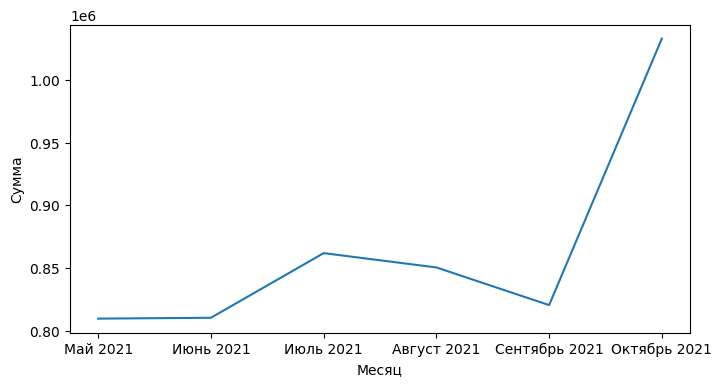

In [10]:
plt.figure(figsize=(8,4))

plt.plot(y.keys(), y.values())
plt.xlabel('Месяц')
plt.ylabel('Сумма')
plt.show()

In [11]:
growth = y['Октябрь 2021'] * 100 / y['Май 2021']
round(growth, 2)

127.62

На графике можно видеть, что минимум по выручке был в мае-июне 2021. Далее выручка начинает расти, но имеет еще один локальный минимум в сентябре, достигая максимума в октябре. В октябре выручка выросла на 128% относительно мая.

#Вопрос 3

Кто из менеджеров привлек для компании больше всего денежных средств в
сентябре 2021?

In [12]:
managers = {} # создадим словарь, в к-ром посчитаем выручку от каждого менеджера за сентябрь 2021
for i in df.index:
  if df['month'][i] == 'Сентябрь 2021':
    sale = df.loc[i, 'sale']
    managers[sale] = managers.get(sale, 0) + df['sum'][i]

managers

{'Иванов': 94770.59999999998,
 'Кузнецова': 72228.4,
 'Андреев': 133652.5,
 'Филимонова': 59514.469999999994,
 'Смирнов': 221525.7000000001,
 'Петрова': 149344.46,
 'Васильев': 49895.45,
 'Соколов': 35183.5,
 'Михайлов': 4268.7}

In [13]:
managers = pd.DataFrame(list(managers.items()), columns=['sale', 'sum']) # преобразуем словарь в датафрейм и отсортируем по убыванию выручки
managers.sort_values(by='sum', inplace=True, ascending=False)
managers

,sale,sum
4,Смирнов,221525.70
5,Петрова,149344.46
2,Андреев,133652.50
0,Иванов,94770.60
1,Кузнецова,72228.40
3,Филимонова,59514.47
6,Васильев,49895.45
7,Соколов,35183.50
8,Михайлов,4268.70


Менеджер Смирнов оказался самым прибыльным для компании в сентябре 2021 года

#Вопрос 4

Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [14]:
oct = df[df['month'] == 'Октябрь 2021']

oct['new/current'].value_counts()

текущая    99
новая      36
Name: new/current, dtype: int64

Текущих сделок в октябре 2021 года было почти в 3 раза больше, чем новых

#Вопрос 5

Сколько оригиналов договора по майским сделкам было получено в июне 2021?

Чтобы решить это задание, создадим отдельную таблицу для мая, в которой добавим колонку с месяцем получения договора.

In [15]:
import datetime as d

may = df[df['month'] == 'Май 2021'][1:] # избавимся от внутреннего договора, т. к. он мешает получению месяца из datetime

may

,client_id,sum,status,sale,new/current,document,receiving_date,month
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,Май 2021
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15 00:00:00,Май 2021
...,...,...,...,...,...,...,...,...
124,277.0,4623.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-14 00:00:00,Май 2021
125,281.0,4488.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16 00:00:00,Май 2021
126,284.0,8903.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-07-27 00:00:00,Май 2021
127,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-05-31 00:00:00,Май 2021


In [16]:
may['month_doc'] = None

for i in may.index:
  may['month_doc'][i] = may['receiving_date'][i].month

may

<ipython-input-16-a9bbe0a3eee1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may['month_doc'][i] = may['receiving_date'][i].month


,client_id,sum,status,sale,new/current,document,receiving_date,month,month_doc
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021,7
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021,6
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021,6
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,Май 2021,7
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15 00:00:00,Май 2021,7
...,...,...,...,...,...,...,...,...,...
124,277.0,4623.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-14 00:00:00,Май 2021,7
125,281.0,4488.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16 00:00:00,Май 2021,7
126,284.0,8903.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-07-27 00:00:00,Май 2021,7
127,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-05-31 00:00:00,Май 2021,5


In [17]:
june_doc = may[may['month_doc'] == 6]

june_doc['document'].value_counts()

оригинал    76
Name: document, dtype: int64

Итого: 76 оригиналов договоров по майским сделкам было получено в июне

#Задание

За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.
1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).
2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).
Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

Для начала создадим колонку bonus, в которой рассчитаем бонус менеджеров по каждой сделке

In [18]:
df['bonus'] = None

for i in df.index:
  if df['new/current'][i] == 'новая' and df['status'][i] == 'ОПЛАЧЕНО' and df['document'][i] == 'оригинал':
    df['bonus'][i] = df['sum'][i] * 0.07
  elif df['new/current'][i] == 'текущая' and df['status'][i] != 'ПРОСРОЧЕНО' and df['document'][i] == 'оригинал':
    if df['sum'][i] > 10000:
      df['bonus'][i] = df['sum'][i] * 0.05
    else:
      df['bonus'][i] = df['sum'][i] * 0.03

df

<ipython-input-18-21b2a6d5dc3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bonus'][i] = df['sum'][i] * 0.07
<ipython-input-18-21b2a6d5dc3b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bonus'][i] = df['sum'][i] * 0.05
<ipython-input-18-21b2a6d5dc3b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bonus'][i] = df['sum'][i] * 0.03


,client_id,sum,status,sale,new/current,document,receiving_date,month,bonus
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-,Май 2021,None
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021,381.689
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021,699.585
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021,21.591
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,Май 2021,127.611
...,...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00,Октябрь 2021,129.861
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN,Октябрь 2021,None
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN,Октябрь 2021,None
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00,Октябрь 2021,308.259


Так как нас просят рассчитать остаток бонусов на 01.07.2021, то создадим отдельную таблицу, в которую отойдут строки с маем и июнем. Это уже заключенные сделки

In [19]:
may_june = df[((df['month'] == 'Май 2021')|(df['month'] == 'Июнь 2021'))&(df['receiving_date'].isnull() == False)][1:]

may_june

,client_id,sum,status,sale,new/current,document,receiving_date,month,bonus
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021,381.689
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021,699.585
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021,21.591
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,Май 2021,127.611
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15 00:00:00,Май 2021,173.901
...,...,...,...,...,...,...,...,...,...
253,281.0,5733.7,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-22 00:00:00,Июнь 2021,172.011
254,282.0,953.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16 00:00:00,Июнь 2021,66.759
255,284.0,8823.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-09-08 00:00:00,Июнь 2021,None
256,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-22 00:00:00,Июнь 2021,103.611


Снова выделим в отдельную колонку месяц получения оригинала договора

In [20]:
may_june['month_doc'] = None

for i in may_june.index:
  may_june['month_doc'][i] = may_june['receiving_date'][i].month

may_june

<ipython-input-20-05a11e65c35f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_june['month_doc'][i] = may_june['receiving_date'][i].month


,client_id,sum,status,sale,new/current,document,receiving_date,month,bonus,month_doc
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,Май 2021,381.689,7
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021,699.585,6
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,Май 2021,21.591,6
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,Май 2021,127.611,7
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15 00:00:00,Май 2021,173.901,7
...,...,...,...,...,...,...,...,...,...,...
253,281.0,5733.7,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-22 00:00:00,Июнь 2021,172.011,7
254,282.0,953.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16 00:00:00,Июнь 2021,66.759,7
255,284.0,8823.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-09-08 00:00:00,Июнь 2021,None,9
256,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-22 00:00:00,Июнь 2021,103.611,7


Если я правильно поняла задание, то остатком будут считаться бонусы, договоры по которым были получены позднее 30 июня, т. е. начиная с 1 июля. Поэтому создадим словарь, в который сложим все бонусы из таблицы may_june, договоры по которым были получены начиная с июля

In [21]:
managers_bonus = {}
for i in may_june.index:
  if may_june['month_doc'][i] >= 7:
    sale = df.loc[i, 'sale']
    if may_june['bonus'][i]:
      managers_bonus[sale] = round(managers_bonus.get(sale, 0) + may_june['bonus'][i], 2)

managers_bonus

{'Петрова': 10770.7,
 'Иванов': 5991.44,
 'Кузнецова': 4496.94,
 'Филимонова': 2317.96,
 'Селиванов': 5297.7,
 'Васильев': 1037.06,
 'Андреев': 3945.83,
 'Смирнов': 6430.25,
 'Соколов': 269.21}

Можно преобразовать его в датафрейм для наглядности

In [22]:
managers_bonus = pd.DataFrame(list(managers_bonus.items()), columns=['sale', 'bonus'])
managers_bonus.sort_values(by='bonus', inplace=True, ascending=False)
managers_bonus

,sale,bonus
0,Петрова,10770.70
7,Смирнов,6430.25
1,Иванов,5991.44
4,Селиванов,5297.70
2,Кузнецова,4496.94
6,Андреев,3945.83
3,Филимонова,2317.96
5,Васильев,1037.06
8,Соколов,269.21
